In [44]:
import networkx as nx
import numpy as np
import cv2
import os
import argparse
import pickle
import matplotlib.pyplot as plt

from artery.Artery import SEMANTIC_MAPPING
from tqdm import tqdm
from artery.data_augmentation import *

In [45]:
class ArteryAugmentationFlow:
    def __init__(self, g, original_image, params):
        self.g = g
        self.original_image = original_image
        self.params = params
    
    def augment(self):
        # 1. blur image
        if np.random.rand() < self.params.blur:
            self.original_image = gaussian_blur(self.original_image)
            add_vessel_image(self.g, original_image)

        # 2. trim graph
        if np.random.rand() < self.params.trim:
            self.g, removed_nodes = trim_graph(self.g, self.params.trim)
            print(f"graph trim, removed nodes = {removed_nodes}")
        
        # 3. rotate graph
        for n in self.g.nodes:
            if np.random.rand() < self.params.rotate:
                angle = np.random.randint(args.rotate_angle) if np.random.randint(2) else -np.random.randint(args.rotate_angle)
                adjusted_angle = check_rotate(self.g, self.g.nodes[n]['data'].vessel_class, angle)
                print(f"rotate artery: {self.g.nodes[n]['data'].vessel_class}, random = {angle}, adjusted = {adjusted_angle}")
                rotate_artery(self.g, self.g.nodes[n]['data'].vessel_class, adjusted_angle)

        # 4. resize
        if np.random.rand() < self.params.resize:
            factor_offset = np.random.uniform(0, self.params.resize_factor)  
            factor = 1.0+factor_offset if np.random.randint(2) else 1.0-factor_offset
            adjusted_factor = check_resize(self.g, "LMA", factor)
            print(f"raw factor = {factor}, adjusted factor = {adjusted_factor}")
            resize_branch(self.g, "LMA", adjusted_factor)

        return self.g, self.original_image

In [46]:
base_path = "/media/z/data21/artery_semantic_segmentation"
data_path = "gmn_vessel/data/data_tw_semantic/processed"
image_size = 512
project_path = "ThinkMatch"

selected_sample_name = "B01_LCA_LAO"

binary_image = cv2.imread(f"{base_path}/{data_path}/{selected_sample_name}/{selected_sample_name}_binary_image.png", cv2.IMREAD_GRAYSCALE)
original_image = cv2.imread(f"{base_path}/{data_path}/{selected_sample_name}/{selected_sample_name}.png",  cv2.IMREAD_GRAYSCALE)

pkl_file_path = f"{base_path}/{data_path}/{selected_sample_name}/{selected_sample_name}_g_switch_unique.pkl"
g_switch= pickle.load(open(pkl_file_path, 'rb'))

pkl_file_path = f"{base_path}/{data_path}/{selected_sample_name}/{selected_sample_name}.pkl"
g = pickle.load(open(pkl_file_path, 'rb'))


# show original image
g_switch = add_vessel_image(g_switch, original_image)
assign_new_obj_to_node(g_switch)

adjusted_angle = check_rotate(g_switch, "LMA", 10)
print(adjusted_angle)
rotate_artery(g_switch, "LMA", adjusted_angle)

3


AssertionError: 

In [33]:
adjusted_angle

3

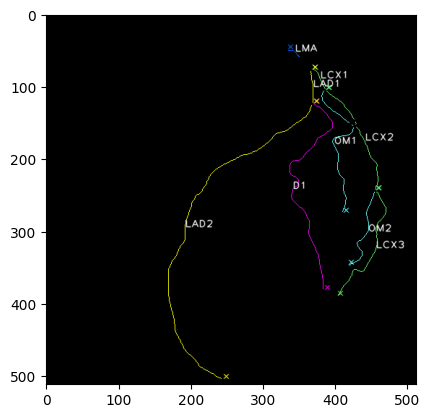

In [34]:
import matplotlib.pyplot as plt
artery_img = visualize_semantic_cv2(g_switch, np.zeros([512, 512], dtype=np.uint8), SEMANTIC_MAPPING)
plt.imshow(artery_img)